In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
curr = pd.read_excel(r'C:\Users\hp\Documents\Time Series\Currency.xlsx', index_col='Date', parse_dates=True)

In [3]:
curr.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-03-08,82.12,82.21,82.38,82.08,2.96M,0.0011
2023-03-06,82.03,81.95,82.07,81.71,3.35M,-0.0006
2023-03-03,82.07,82.55,82.60,82.02,3.95M,-0.0076
2023-03-02,82.71,82.60,82.72,82.60,1.38M,0.0011
2023-03-01,82.61,82.64,82.75,82.49,2.45M,-0.0012


In [4]:
curr.tail()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2015-02-05,61.97,62.15,62.24,61.93,1.18M,-0.0011
2015-02-04,62.04,61.90,62.15,61.82,1.19M,0.0008
2015-02-03,61.99,61.92,62.14,61.90,1.42M,-0.0021
2015-02-02,62.12,62.31,62.35,62.05,1.03M,-0.0018
2015-01-30,62.23,62.19,62.35,62.00,1.63M,0.0011


In [6]:
curr = curr.sort_index(ascending=[True])

In [7]:
curr.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2015-01-30,62.23,62.19,62.35,62.00,1.63M,0.0011
2015-02-02,62.12,62.31,62.35,62.05,1.03M,-0.0018
2015-02-03,61.99,61.92,62.14,61.90,1.42M,-0.0021
2015-02-04,62.04,61.90,62.15,61.82,1.19M,0.0008
2015-02-05,61.97,62.15,62.24,61.93,1.18M,-0.0011


In [8]:
curr.tail()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-03-01,82.61,82.64,82.75,82.49,2.45M,-0.0012
2023-03-02,82.71,82.60,82.72,82.60,1.38M,0.0011
2023-03-03,82.07,82.55,82.60,82.02,3.95M,-0.0076
2023-03-06,82.03,81.95,82.07,81.71,3.35M,-0.0006
2023-03-08,82.12,82.21,82.38,82.08,2.96M,0.0011


In [9]:
curr.drop(['Open', 'High', 'Low', 'Volume', 'Chg%'], axis=1, inplace=True)

In [10]:
curr.head()

,Price
Date,
2015-01-30,62.23
2015-02-02,62.12
2015-02-03,61.99
2015-02-04,62.04
2015-02-05,61.97


In [11]:
curr.tail()

,Price
Date,
2023-03-01,82.61
2023-03-02,82.71
2023-03-03,82.07
2023-03-06,82.03
2023-03-08,82.12


In [12]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1968 entries, 2015-01-30 to 2023-03-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1968 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB


In [13]:
curr.describe()

,Price
count,1968.000000
mean,70.746413
std,5.229278
min,61.930000
25%,66.650000
50%,70.595000
75%,74.442500
max,83.150000


In [14]:
curr_train = curr.loc[:'2022']
curr_test  = curr.loc['2023':]

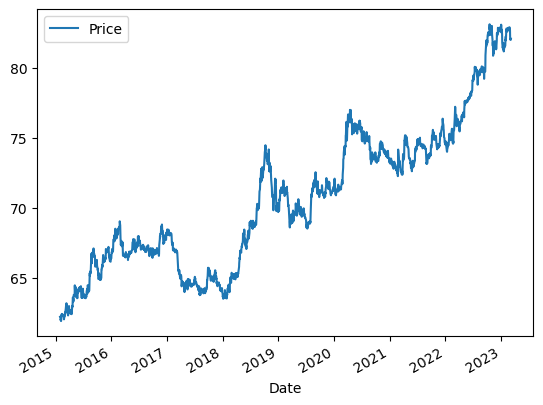

In [17]:
fig, ax = plt.subplots()
curr.plot(ax=ax)
plt.show()

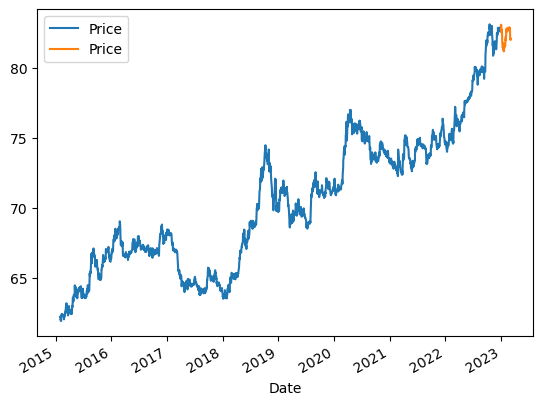

In [19]:
fig, ax1 = plt.subplots()
curr_train.plot(ax=ax1)
curr_test.plot(ax=ax1)
plt.show()

In [20]:
curr.index

DatetimeIndex(['2015-01-30', '2015-02-02', '2015-02-03', '2015-02-04',
               '2015-02-05', '2015-02-06', '2015-02-09', '2015-02-10',
               '2015-02-11', '2015-02-12',
               ...
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-27',
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-06', '2023-03-08'],
              dtype='datetime64[ns]', name='Date', length=1968, freq=None)

In [21]:
curr_diff = curr.diff().dropna()

In [22]:
curr_diff.head()

,Price
Date,
2015-02-02,-0.11
2015-02-03,-0.13
2015-02-04,0.05
2015-02-05,-0.07
2015-02-06,-0.04


In [23]:
curr_diff.tail()

,Price
Date,
2023-03-01,-0.10
2023-03-02,0.10
2023-03-03,-0.64
2023-03-06,-0.04
2023-03-08,0.09


In [24]:
curr_train_diff = curr_diff.loc[:'2022']
curr_test_diff = curr_diff.loc['2023':]

In [26]:
result = adfuller(curr_diff)
print(result)

(-21.48923883687631, 0.0, 3, 1963, {'1%': -3.4336856453443994, '5%': -2.863013493272342, '10%': -2.5675544273932758}, 26.08693041359402)


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                 0
count  1968.000000
mean      0.041956
std       1.423240
min      -1.063008
25%      -0.123660
50%      -0.004310
75%       0.130641
max      62.230000


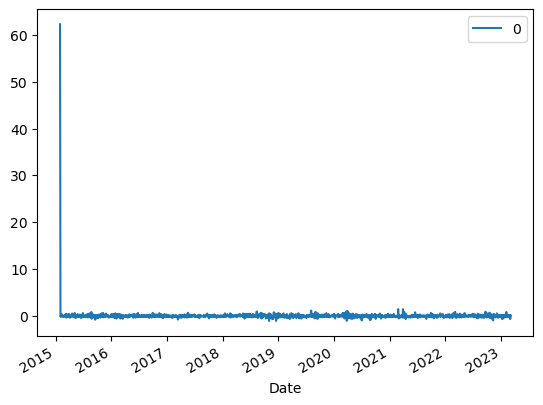

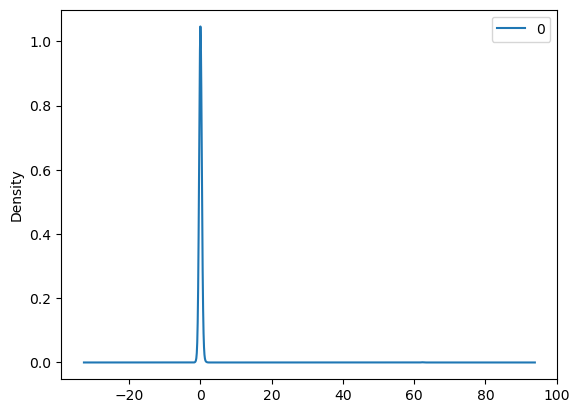

In [28]:
# fit model
model = ARIMA(curr, order=(2,1,2)) # p, d, q
model_fit = model.fit()
#print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 0
count  1922.000000
mean      0.043398
std       1.439603
min      -1.063363
25%      -0.123795
50%      -0.004040
75%       0.131119
max      62.230000


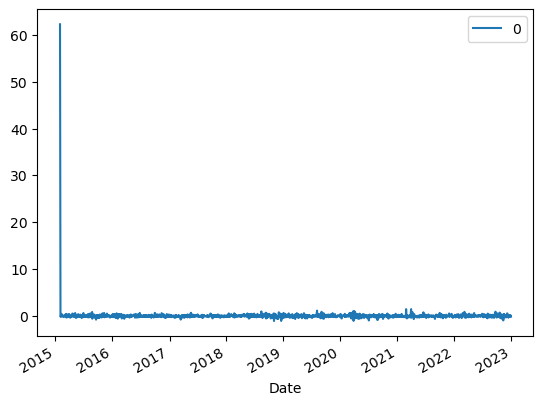

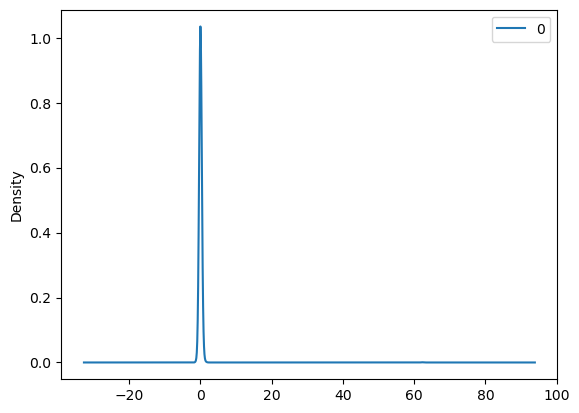

In [37]:
# fit model
model = ARIMA(curr_train['Price'], order=(2,1,2)) # p, d, q
model_fit = model.fit()
#print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 0
count  1921.000000
mean     -0.000751
std       0.241573
min      -1.067112
25%      -0.135856
50%      -0.015320
75%       0.118228
max       1.452952


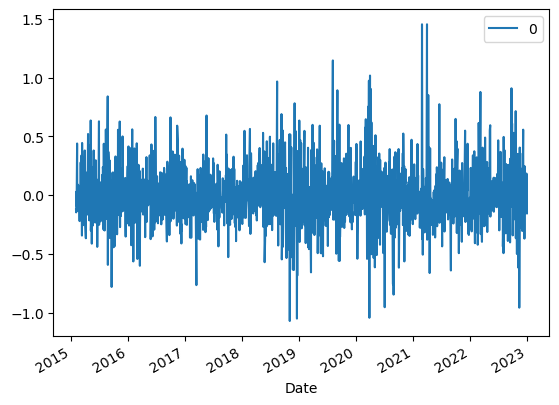

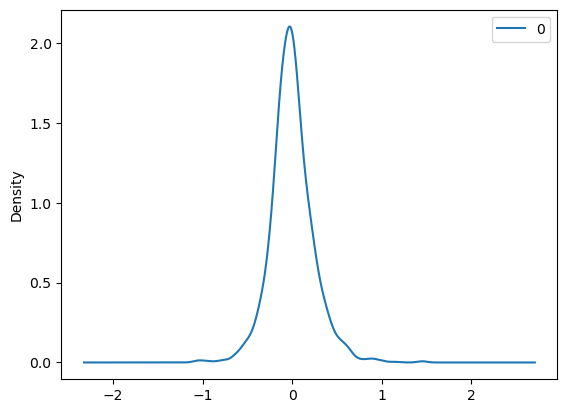

In [32]:
# fit model
model = ARIMA(curr_train_diff, order=(2,0,2)) # p, d, q
model_fit = model.fit()
#print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

In [38]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1922
Model:                 ARIMA(2, 1, 2)   Log Likelihood                   1.949
Date:                Mon, 20 Mar 2023   AIC                              6.103
Time:                        18:30:02   BIC                             33.906
Sample:                             0   HQIC                            16.332
                               - 1922                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1694      0.022     53.379      0.000       1.126       1.212
ar.L2         -0.9411      0.022    -43.368      0.000      -0.984      -0.899
ma.L1         -1.2062      0.020    -61.760      0.0

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


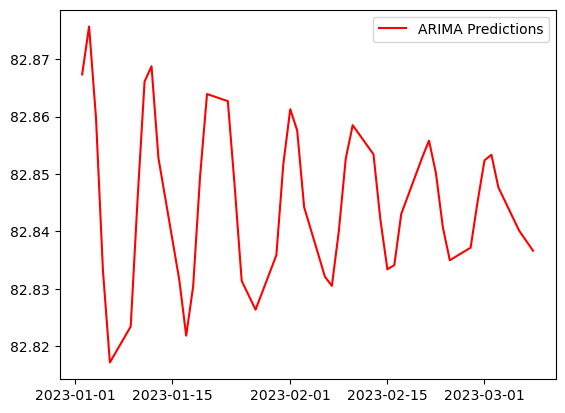

In [39]:
y_pred = model_fit.get_forecast(len(curr_test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = model_fit.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = curr_test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Red', label = 'ARIMA Predictions')
plt.legend()

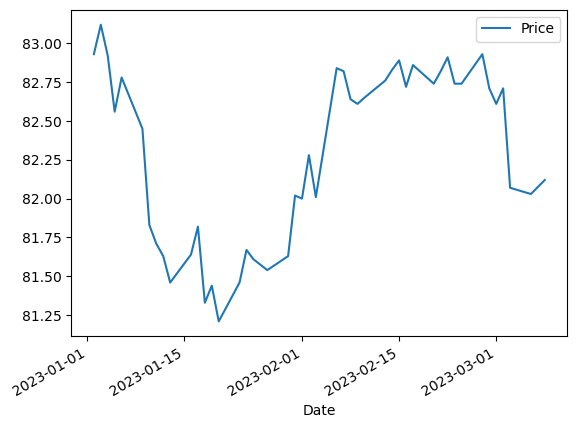

In [40]:
fig, ax = plt.subplots()
curr_test.plot(ax=ax)
plt.show()

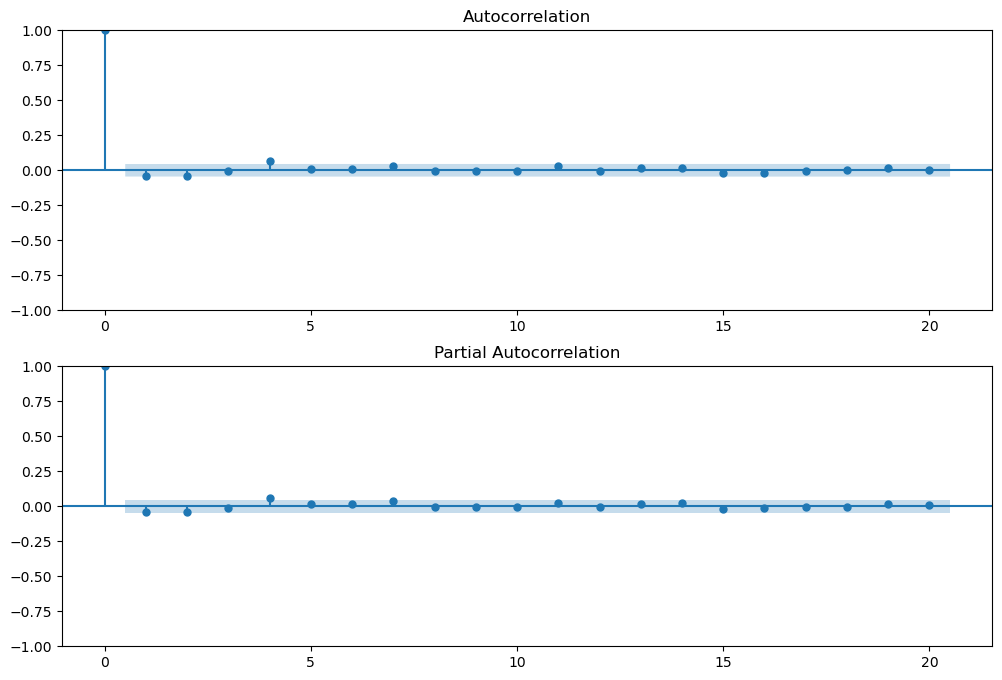

In [42]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(curr_train_diff,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(curr_train_diff,lags=20,ax=ax2)

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=18.886, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19.357, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=18.665, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=19.442, Time=0.33 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=17.912, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=19.911, Time=0.66 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=19.909, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=16.138, Time=0.75 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=7.839, Time=1.97 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5.998, Time=1.77 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=19.541, Time=0.48 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=17.555, Time=2.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=19.669, Time=1.02 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=9.845, Time=2.02 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4.016, Time=3.42 sec
 

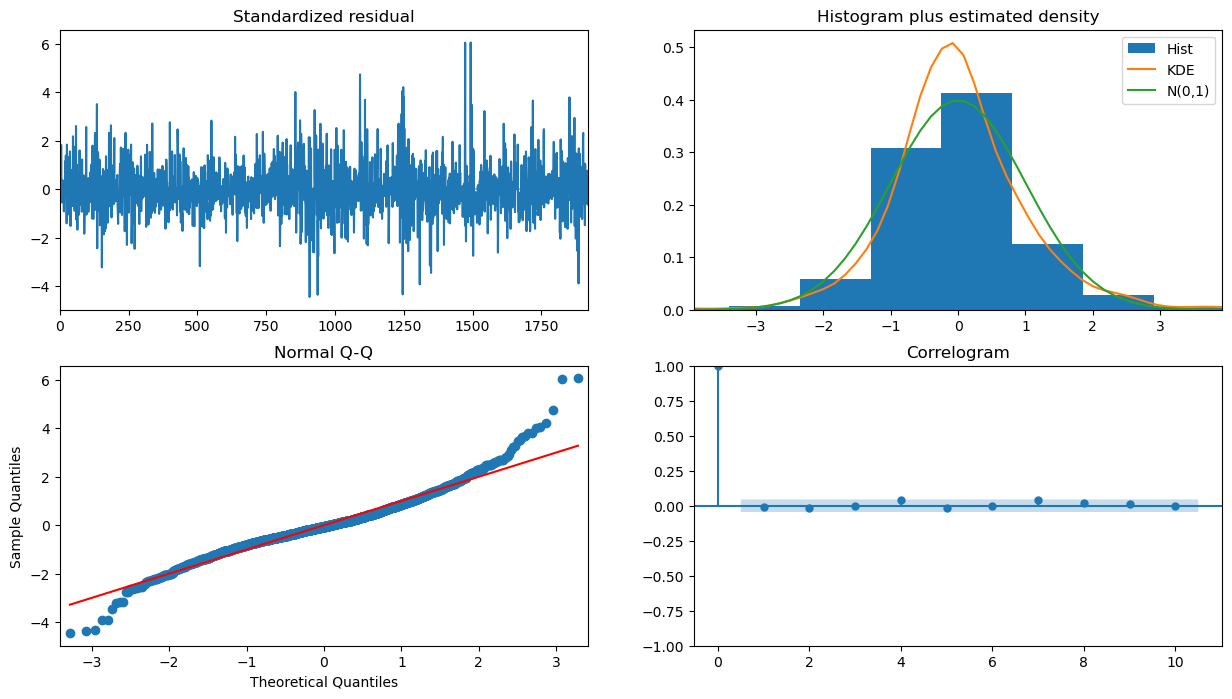

In [47]:
model_autoARIMA = auto_arima(curr_train_diff['Price'], start_p=1, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4.010, Time=3.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17.611, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16.849, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16.588, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19.357, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17.510, Time=1.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17.117, Time=1.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15.206, Time=2.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14.893, Time=3.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17.147, Time=1.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14.865, Time=2.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=17.113, Time=1.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=7.827, Time=5.41 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6.103, Time=1.70 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 2

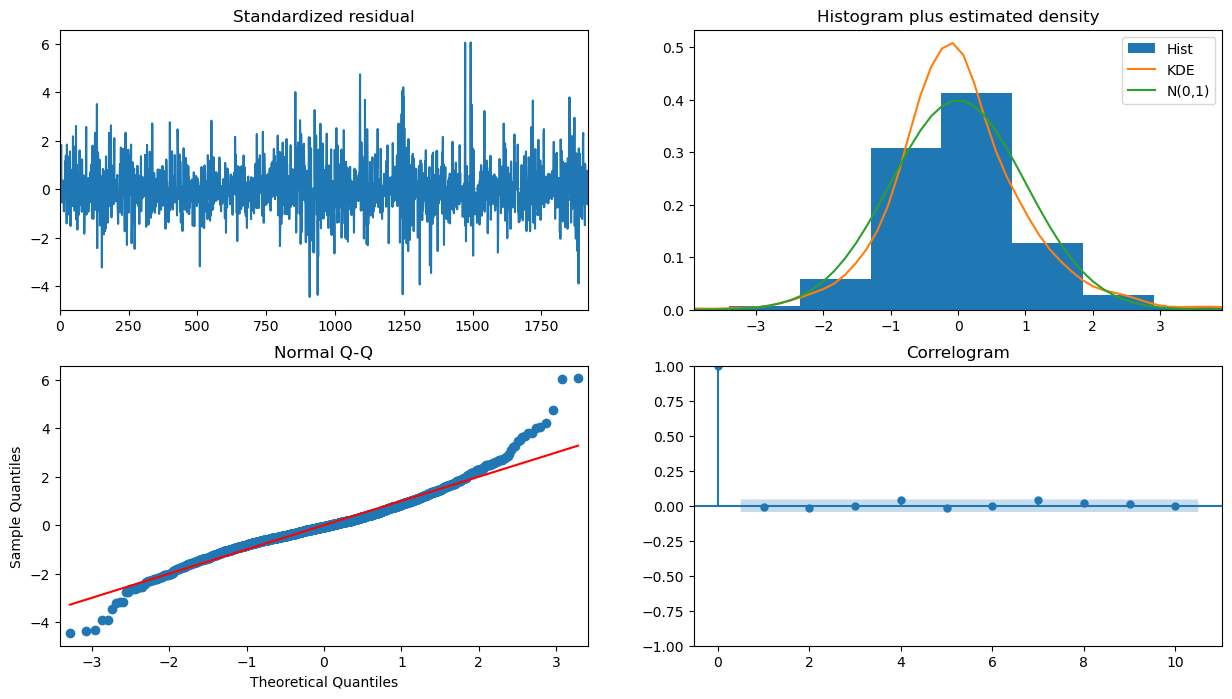

In [49]:
model_autoARIMA = auto_arima(curr_train['Price'], start_p=2, start_q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [115]:
#model_autoARIMA = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model_autoARIMA.fit(curr_train)

start_index = '2023-01-02'
end_index = '2023-03-08'

#only able to forecast 10 values, therefore
endd_index = '2023-01-13'
curr_test_10 = curr_test.iloc[-46:-36]

#forecast = model_autoARIMA.predict(start=len(curr_train), end=(len(curr)-1))
#forecast = model_autoARIMA.predict(start=start_index, end=end_index)
#forecast = pd.DataFrame(forecast,index = curr_test.index,columns=['Prediction'])
##
forecast = model_autoARIMA.predict(start=start_index, end=endd_index)
#forecast = pd.DataFrame(forecast,index = curr_test_10.index,columns=['Prediction'])

#plot the predictions for validation set

#plt.plot(curr_train, label='Train')
#plt.plot(curr_test, label='Test')
#plt.plot(forecast, label='Prediction')
#plt.legend()
#plt.show()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


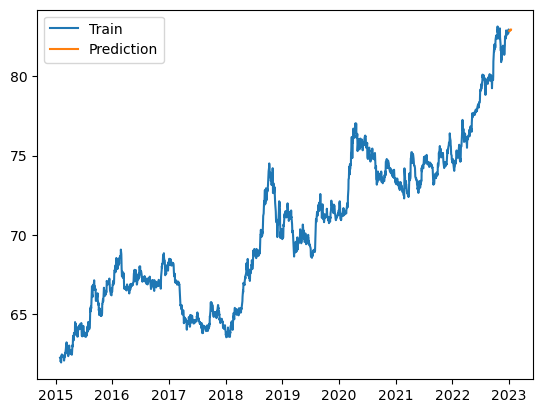

In [125]:
#model_autoARIMA = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model_autoARIMA.fit(curr_train)

start_index = '2023-01-02'
end_index = '2023-03-08'

#only able to forecast 10 values, therefore
endd_index = '2023-01-13'
curr_test_10 = curr_test.iloc[-46:-36]

##
#forecast = model_autoARIMA.predict(start=start_index, end=endd_index)
#forecast = pd.DataFrame(forecast,index = curr_test_10.index,columns=['Prediction'])

##
#forecast.index = curr_test_10.index
#forecast = pd.DataFrame(forecast)
#forecast.columns = ['Prediction']

#plot the predictions for validation set

plt.plot(curr_train, label='Train')
#plt.plot(curr_test, label='Test')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()

In [116]:
forecast.index = curr_test_10.index
print(forecast)

Date
2023-01-02    82.877045
2023-01-03    82.895846
2023-01-04    82.891232
2023-01-05    82.876301
2023-01-06    82.871335
2023-01-09    82.887814
2023-01-10    82.920106
2023-01-11    82.950755
2023-01-12    82.964552
2023-01-13    82.960089
dtype: float64


In [121]:
forecast = pd.DataFrame(forecast)
print(forecast)

                    0
Date                 
2023-01-02  82.877045
2023-01-03  82.895846
2023-01-04  82.891232
2023-01-05  82.876301
2023-01-06  82.871335
2023-01-09  82.887814
2023-01-10  82.920106
2023-01-11  82.950755
2023-01-12  82.964552
2023-01-13  82.960089


In [122]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2023-01-02 to 2023-01-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


In [123]:
forecast.columns = ['Prediction']

In [124]:
print(forecast)

            Prediction
Date                  
2023-01-02   82.877045
2023-01-03   82.895846
2023-01-04   82.891232
2023-01-05   82.876301
2023-01-06   82.871335
2023-01-09   82.887814
2023-01-10   82.920106
2023-01-11   82.950755
2023-01-12   82.964552
2023-01-13   82.960089


In [119]:
type(forecast)

pandas.core.series.Series

In [112]:
curr_test_10

,Price
Date,
2023-01-02,82.93
2023-01-03,83.12
2023-01-04,82.92
2023-01-05,82.56
2023-01-06,82.78
2023-01-09,82.45
2023-01-10,81.83
2023-01-11,81.71
2023-01-12,81.63


In [91]:
dynamic_forecast = model_autoARIMA.predict(start=-46, dynamic=True)


# Extract prediction mean
#mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
#confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
#lower_limits = confidence_intervals.loc[:, 'lower close']
#upper_limits = confidence_intervals.loc[:, 'upper close']

# Print bet estimate predictions
#print(mean_forecast.values)


1922    82.877045
1923    82.895846
1924    82.891232
1925    82.876301
1926    82.871335
1927    82.887814
1928    82.920106
1929    82.950755
1930    82.964552
1931    82.960089
dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [94]:
print(dynamic_forecast)

1922    82.877045
1923    82.895846
1924    82.891232
1925    82.876301
1926    82.871335
1927    82.887814
1928    82.920106
1929    82.950755
1930    82.964552
1931    82.960089
dtype: float64


AttributeError: 'ARIMA' object has no attribute 'get_prediction'

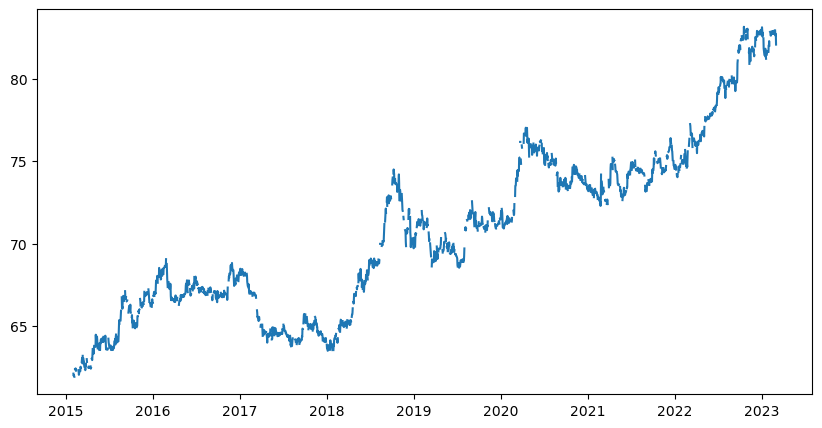

In [82]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))


start_index = '2023-01-02'
end_index = '2023-03-08'

plt.plot(df)
plot_predict(model_autoARIMA, start=len(curr_train), end=(len(curr)-1), ax=axs)

In [114]:
print(forecast)

            Prediction
Date                  
2023-01-02         NaN
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06         NaN
2023-01-09         NaN
2023-01-10         NaN
2023-01-11         NaN
2023-01-12         NaN
2023-01-13         NaN


In [101]:
type(forecast)

pandas.core.series.Series

In [51]:
curr_test.head()

,Price
Date,
2023-01-02,82.93
2023-01-03,83.12
2023-01-04,82.92
2023-01-05,82.56
2023-01-06,82.78


In [52]:
curr_test.tail()

,Price
Date,
2023-03-01,82.61
2023-03-02,82.71
2023-03-03,82.07
2023-03-06,82.03
2023-03-08,82.12


In [126]:
rms = sqrt(mean_squared_error(curr_test_10,forecast))
print(rms)

0.8433888845586237


In [77]:
type(forecast)

pandas.core.frame.DataFrame

In [57]:
df = curr

In [58]:
df.head()

,Price
Date,
2015-01-30,62.23
2015-02-02,62.12
2015-02-03,61.99
2015-02-04,62.04
2015-02-05,61.97


In [59]:
df.tail()

,Price
Date,
2023-03-01,82.61
2023-03-02,82.71
2023-03-03,82.07
2023-03-06,82.03
2023-03-08,82.12


In [60]:
type(df)

pandas.core.frame.DataFrame

In [61]:
df = df.resample('D').mean()

df_week = df.resample('W').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [62]:
df.head(10)

,Price
Date,
2015-01-30,62.23
2015-01-31,NaN
2015-02-01,NaN
2015-02-02,62.12
2015-02-03,61.99
2015-02-04,62.04
2015-02-05,61.97
2015-02-06,61.93
2015-02-07,NaN


In [63]:
df_week.head(10)

,Price
Date,
2015-02-01,62.230000
2015-02-08,62.010000
2015-02-15,62.376000
2015-02-22,62.316667
2015-03-01,62.196000
2015-03-08,62.390000
2015-03-15,62.968000
2015-03-22,62.798000
2015-03-29,62.490000


In [64]:
df_month.head(10)

,Price
Date,
2015-01-31,62.230000
2015-02-28,62.214444
2015-03-31,62.698571
2015-04-30,62.938333
2015-05-31,63.947368
2015-06-30,64.025455
2015-07-31,63.819130
2015-08-31,65.270000
2015-09-30,66.406000


In [65]:
df_year.head(10)

,Price
Date,
2015-12-31,64.513378
2016-12-31,67.348174
2017-12-31,65.226379
2018-12-31,68.498589
2019-12-31,70.524074
2020-12-31,74.185894
2021-12-31,74.059298
2022-12-31,78.781393
2023-12-31,82.300000


In [66]:
df_Q.head(10)

,Price
Date,
2015-03-31,62.469000
2015-06-30,63.668644
2015-09-30,65.100952
2015-12-31,66.090000
2016-03-31,67.652667
2016-06-30,67.102000
2016-09-30,67.099508
2016-12-31,67.542667
2017-03-31,67.119333


In [67]:
df.Price

Date
2015-01-30    62.23
2015-01-31      NaN
2015-02-01      NaN
2015-02-02    62.12
2015-02-03    61.99
              ...  
2023-03-04      NaN
2023-03-05      NaN
2023-03-06    82.03
2023-03-07      NaN
2023-03-08    82.12
Freq: D, Name: Price, Length: 2960, dtype: float64

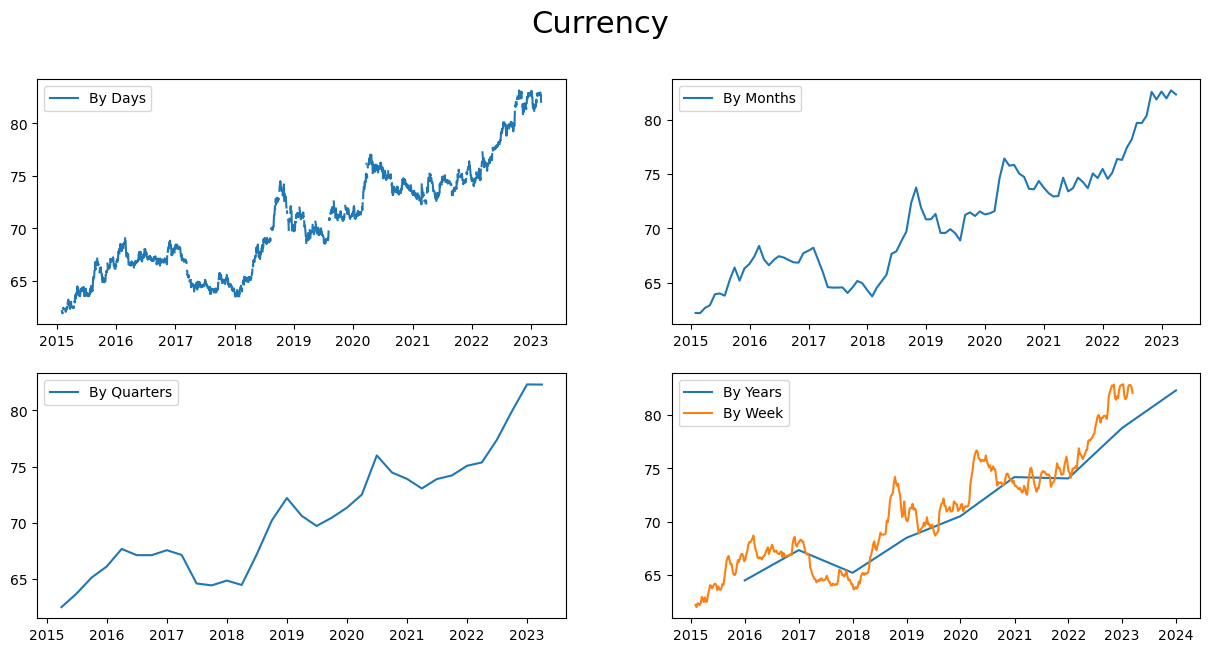

In [68]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Currency', fontsize=22)

plt.subplot(221)
plt.plot(df.Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Price, '-', label='By Years')
plt.legend()


plt.plot(df_week.Price, '-', label='By Week')
plt.legend()
# plt.tight_layout()
plt.show()

Dickey–Fuller test: p=0.841622


<Figure size 2000x1000 with 0 Axes>

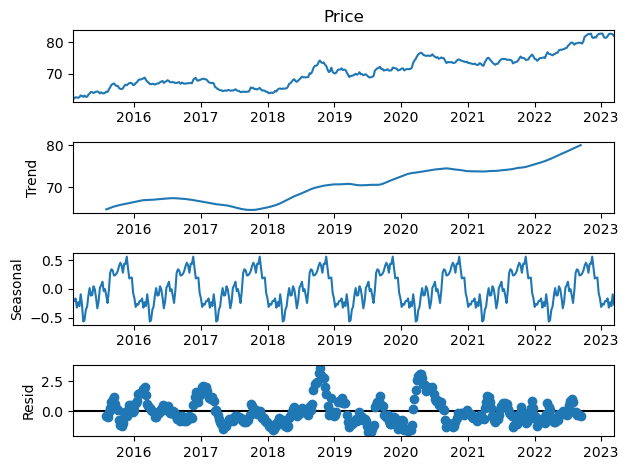

In [70]:
plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(df_week.Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_week.Price)[1])
plt.show()

In [71]:
df_week['prices_box_diff'] = df_week.Price - df_week.Price.shift(12)

print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_week.prices_box_diff[12:])[1])
print(df_week['prices_box_diff'])

Dickey–Fuller test: p=0.001343
Date
2015-02-01      NaN
2015-02-08      NaN
2015-02-15      NaN
2015-02-22      NaN
2015-03-01      NaN
              ...  
2023-02-12    1.284
2023-02-19    1.058
2023-02-26    1.220
2023-03-05    0.230
2023-03-12   -0.653
Freq: W-SUN, Name: prices_box_diff, Length: 424, dtype: float64


<Figure size 1500x700 with 0 Axes>

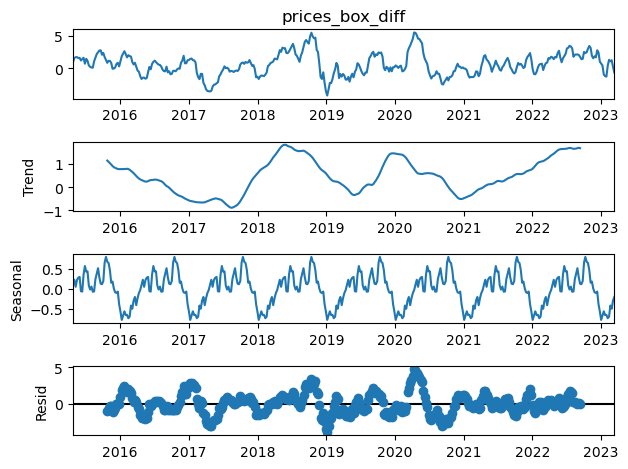

In [72]:
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_week.prices_box_diff[12:]).plot()   


plt.show()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


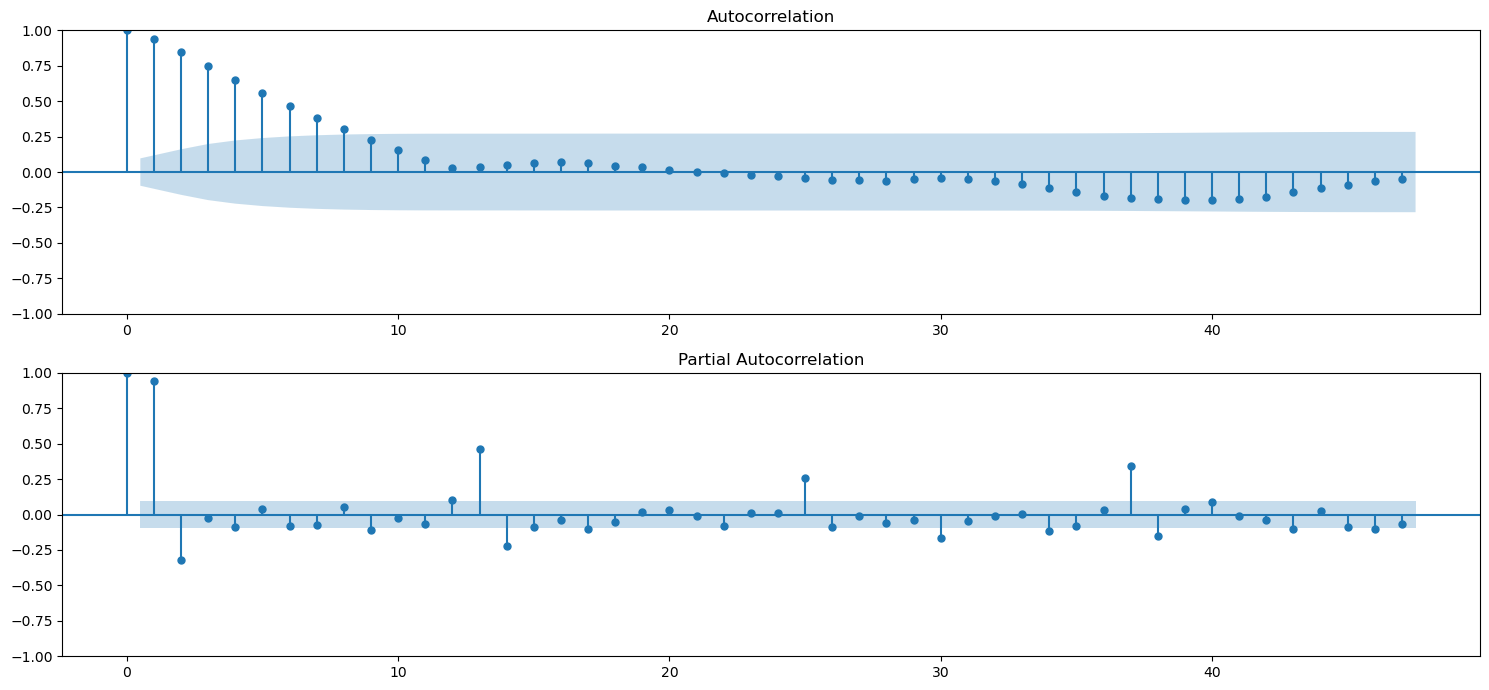

In [73]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))

ax = plt.subplot(211)

sm.graphics.tsa.plot_acf(df_week.prices_box_diff[12:].values.squeeze(), lags=47, ax=ax)

ax = plt.subplot(212)

sm.graphics.tsa.plot_pacf(df_week.prices_box_diff[12:].values.squeeze(), lags=47, ax=ax)


plt.tight_layout()
plt.show()

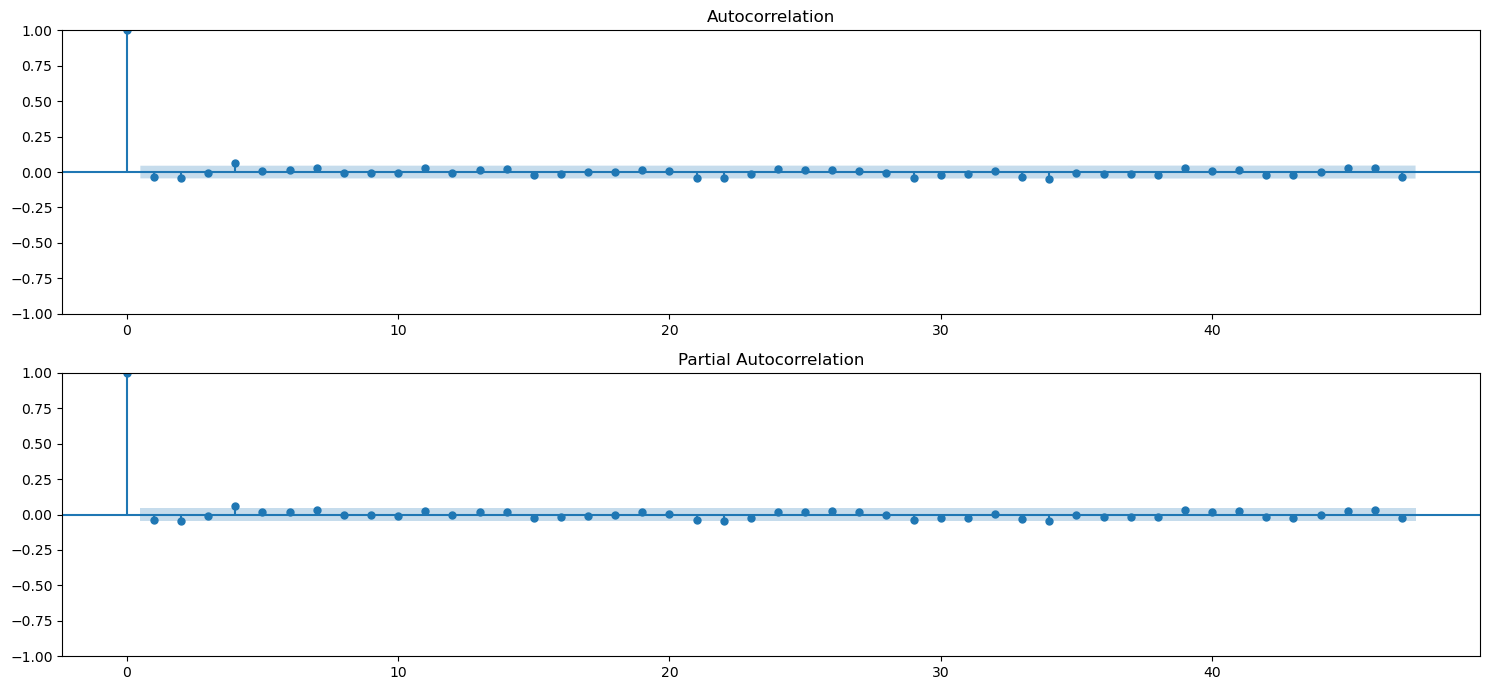

In [74]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))

ax = plt.subplot(211)

sm.graphics.tsa.plot_acf(curr_train_diff.Price.values.squeeze(), lags=47, ax=ax)

ax = plt.subplot(212)

sm.graphics.tsa.plot_pacf(curr_train_diff.Price.values.squeeze(), lags=47, ax=ax)


plt.tight_layout()
plt.show()